In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

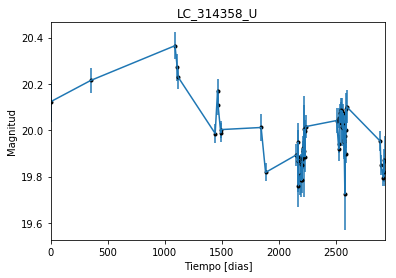

In [2]:
data = np.genfromtxt('LC_314358_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_314358_U')
plt.savefig("LC_314358_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

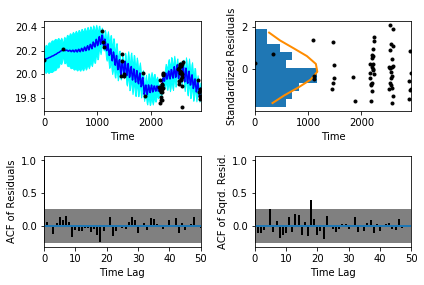

In [5]:
sample.assess_fit()

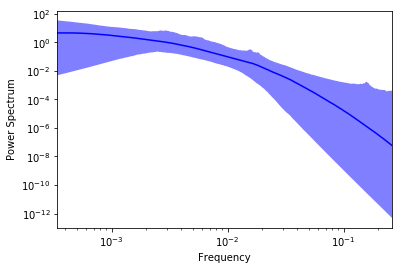

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

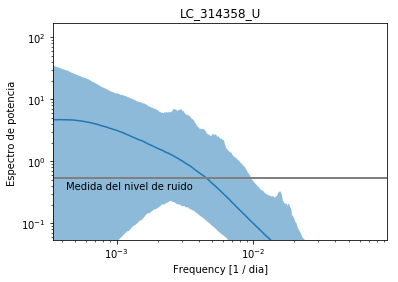

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_314358_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_314358_U')

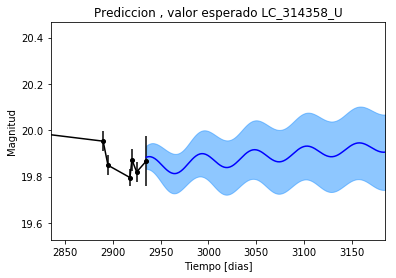

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_314358_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_314358_U')

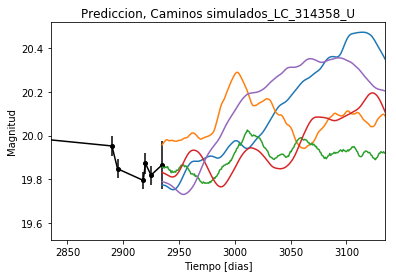

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_314358_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


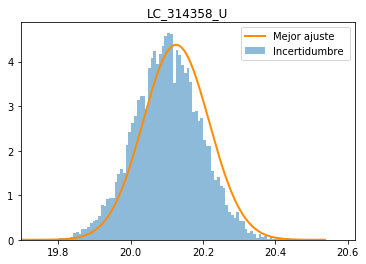

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_314358_U')
plt.savefig("Mejor_ajuste_LC_314358_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_314358_U')

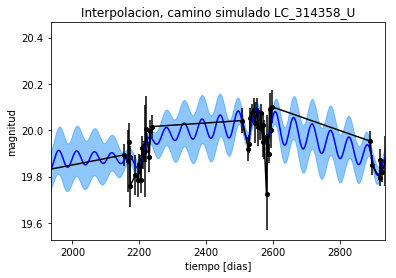

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_U')

Text(0.5,1,'Interpolacion, camino simulado LC_314358_U')

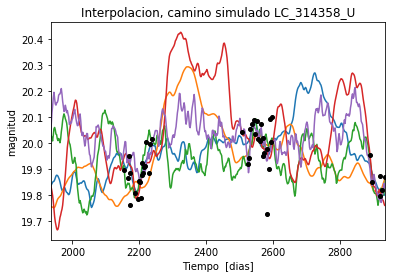

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_314358_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 603.163864873
Median: 0.0083705244126
Standard deviation: 0.0944226094232
68% credibility interval: [ 0.00111678  0.08739823]
95% credibility interval: [ 0.00040081  0.38327613]
99% credibility interval: [  3.46465801e-04   4.88248275e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 415.97200925
Median: 0.00356842109235
Standard deviation: 0.0362906891934
68% credibility interval: [ 0.00074287  0.02613171]
95% credibility interval: [ 0.00037497  0.12143641]
99% credibility interval: [ 0.00034647  0.22398647]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 607.644869607
Median: 0.0406976372109
Standard deviation: 0.1358850

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 501.030753474
Median: 84.1315964154
Standard deviation: 1.86996996976
68% credibility interval: [ 82.15344805  85.35861663]
95% credibility interval: [ 79.3388411   87.14496757]
99% credibility interval: [ 77.15012413  87.87233493]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 684.122063635
Median: 0.67807451047
Standard deviation: 1.15682645866
68% credibility interval: [ 0.1301098   2.38740289]
95% credibility interval: [ 0.03253225  4.00270313]
99% credibility interval: [ 0.01737012  5.17860916]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 803.811764925
Median: 0.225297292588
Standard deviation: 2.2789596931
68% credibility interval: [ 0.0189435  2.7395617]
95% credibility interval: [  6.58433997e-03   

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1088.16188427
Median: 2.91385864268e-10
Standard deviation: 5.150898678e+94
68% credibility interval: [  2.00657386e-58   1.28983243e+35]
95% credibility interval: [  5.16030390e-90   1.31688174e+65]
99% credibility interval: [  3.64118093e-95   2.96320235e+92]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1617.00150741
Median: 20.0309024795
Standard deviation: 0.0691413077482
68% credibility interval: [ 19.97631787  20.09470268]
95% credibility interval: [ 19.9077854   20.18881251]
99% credibility interval: [ 19.84691859  20.26443045]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 349.152274945
Median: 0.0168292008966
Standard deviation: 0.124354279512
68% credibility interval: [ 0.          0.19073987]
95% credibility interval: [ 0.          0.45221356]
99% credibility interval: [ 0.         0.5119891]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 349.152274945
Median: 0.0168292008966
Standard deviation: 0.124354279512
68% credibility interval: [ 0.          0.19073987]
95% credibility interval: [ 0.          0.45221356]
99% credibility interval: [ 0.         0.5119891]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 643.645176207
Median: 0.0
Standard deviation: 0.00136557114684
68% credibi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 501.030753474
Median: 84.1315964154
Standard deviation: 1.86996996976
68% credibility interval: [ 82.15344805  85.35861663]
95% credibility interval: [ 79.3388411   87.14496757]
99% credibility interval: [ 77.15012413  87.87233493]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1288.16934473
Median: 0.0266275870507
Standard deviation: 0.023201453265
68% credibility interval: [ 0.01700539  0.0455607 ]
95% credibility interval: [ 0.01154768  0.08736027]
99% credibility interval: [ 0.00922713  0.13761494]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2129.92542879
Median: 0.94659681911
Standard deviation: 0.161832559682
68% credibility interval: [ 0.80557954  1.12104946]
95% credibility interval: [ 0.69451293  1.32574213]
99% credibility interval: [ 0.64017109  1.48865903]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 485.856139073
Median: 7.46301730976e-05
Standard deviation: 0.0285287277556
68% credibility interval: [  1.60288299e-38   8.29679870e-03]
95% credibility interval: [  5.81171272e-69   8.05256347e-02]
99% credibility interval: [  6.64017939e-96   2.05316204e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 603.163864873
Median: (-0.0525935560026-0.396664967757j)
Standard deviation: 0.981054871862
68% credibility interval: [-0.54913927-0.15499554j -0.00701693-0.09417491j]
95% credibility interval: [-2.40819493+0.j         -0.00251835-0.99728355j]
99% credibility interval: [ -3.06775439e+00+0.j         -2.17690883e-03-0.0176169j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 415.97200925
Median: (-0.0224210509773+0.0963320605671j)
Standard deviation: 0.813933267239
68% credibility interval: [-0.16419037+0.19134951j -0.00466761+0.j        ]
95% credibility interval: [-0.76300749+0.40134903j -0.00235601+0.11485266j]
99% credibility interval: [-1.40734850+2.94508101j -0.00217691+0.0176169j ]
Posterior summary for parameter 